In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
url= "https://www.sciencebase.gov/catalog/file/get/60bfb8a4d34e86b938916d6f?f=__disk__1e%2Ff1%2F4f%2F1ef14feff3b038ff6ccb9f4e755e71dc47835e95"
data=pd.read_csv(url)
data

,Site,Status,ID,Date,Lat,Lon,Depth_mid,Elevation,DBD,210Pb,...,7Be_e,wtC,wtN,Age,Age_e,VAR,MAR,CAR,Year,LOI
0,Fort de Soto,Mangrove,FDS,10/19/2015,27.627500,-82.715883,0.5,-77.6,0.1542,5.8632,...,0,26.36,1.47,2.3,1.8,4.4,675.0,178.0,2013.6,52.2624
1,Fort de Soto,Mangrove,FDS,10/19/2015,27.627500,-82.715883,1.5,-78.6,0.2267,4.9199,...,0,,,5.6,2,3,679.0,NaN,2010.3,
2,Fort de Soto,Mangrove,FDS,10/19/2015,27.627500,-82.715883,2.5,-79.6,0.2153,4.3535,...,0,18.64,1.02,8.8,2.1,3.2,681.0,127.0,2007.1,
3,Fort de Soto,Mangrove,FDS,10/19/2015,27.627500,-82.715883,3.5,-80.6,0.2311,4.1246,...,0,,,12.4,2.3,2.8,647.0,NaN,2003.5,
4,Fort de Soto,Mangrove,FDS,10/19/2015,27.627500,-82.715883,4.5,-81.6,0.303,2.6846,...,0,16.09,0.87,15.7,2.6,3,904.0,145.0,2000.2,33.5478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Upper Tampa Bay,Salt Barren,UTSB,10/21/2015,28.007596,-82.631427,7.5,41.6,,1.0121,...,0,,,,,,NaN,NaN,,1.1794
273,Upper Tampa Bay,Salt Barren,UTSB,10/21/2015,28.007596,-82.631427,12.5,36.6,,0.7145,...,0,,,,,,NaN,NaN,,1.1747
274,Upper Tampa Bay,Salt Barren,UTSB,10/21/2015,28.007596,-82.631427,17.5,31.6,,0.9389,...,0,,,,,,NaN,NaN,,1.1071
275,Upper Tampa Bay,Salt Barren,UTSB,10/21/2015,28.007596,-82.631427,22.5,26.6,,0.582,...,0,,,,,,NaN,NaN,,1.1615


In [3]:
df = data[['Site','Status','Lat','Lon','Elevation','VAR','MAR','CAR']].copy()
df

,Site,Status,Lat,Lon,Elevation,VAR,MAR,CAR
0,Fort de Soto,Mangrove,27.627500,-82.715883,-77.6,4.4,675.0,178.0
1,Fort de Soto,Mangrove,27.627500,-82.715883,-78.6,3,679.0,NaN
2,Fort de Soto,Mangrove,27.627500,-82.715883,-79.6,3.2,681.0,127.0
3,Fort de Soto,Mangrove,27.627500,-82.715883,-80.6,2.8,647.0,NaN
4,Fort de Soto,Mangrove,27.627500,-82.715883,-81.6,3,904.0,145.0
...,...,...,...,...,...,...,...,...
272,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,41.6,,NaN,NaN
273,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,36.6,,NaN,NaN
274,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,31.6,,NaN,NaN
275,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,26.6,,NaN,NaN


In [16]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [4]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
# plot map on axis
states = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
states[states["name"] == "Florida"].plot(color="lightgrey",
                                                 ax=ax)
# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")
# plot points
df.plot(x="longitude", y="latitude", kind="scatter", 
        c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

C:\Users\mille628\Anaconda3\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


KeyError: 'acq_date'

ValueError: cannot convert float NaN to integer

<Figure size 576x432 with 1 Axes>

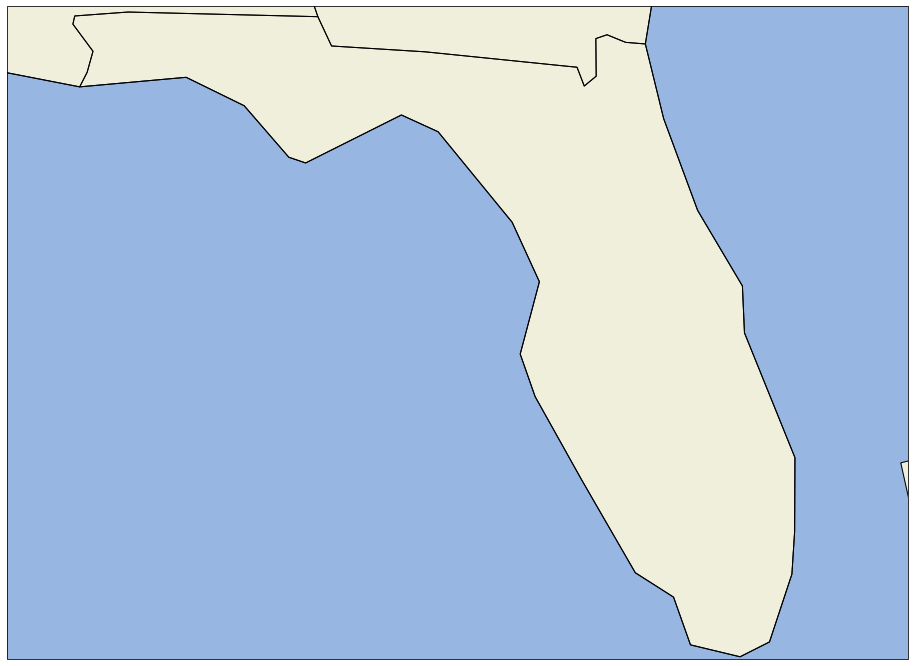

In [6]:
latN = 31
latS = 25
lonW = -88
lonE = -79
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
res = '110m' # Coarsest and quickest to display; other options are '10m' (slowest) and '50m'.
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature (cfeature.LAND.with_scale(res))
ax.add_feature (cfeature.OCEAN.with_scale(res))
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.STATES.with_scale(res));




In [7]:
mangroves= df[df.Status=="Mangrove"]
mangroves

,Site,Status,Lat,Lon,Elevation,VAR,MAR,CAR
0,Fort de Soto,Mangrove,27.627500,-82.715883,-77.6,4.4,675.0,178.0
1,Fort de Soto,Mangrove,27.627500,-82.715883,-78.6,3,679.0,NaN
2,Fort de Soto,Mangrove,27.627500,-82.715883,-79.6,3.2,681.0,127.0
3,Fort de Soto,Mangrove,27.627500,-82.715883,-80.6,2.8,647.0,NaN
4,Fort de Soto,Mangrove,27.627500,-82.715883,-81.6,3,904.0,145.0
...,...,...,...,...,...,...,...,...
266,Weedon Island,Mangrove,27.846063,-82.601500,-43.4,,NaN,NaN
267,Weedon Island,Mangrove,27.846063,-82.601500,-44.4,,NaN,NaN
268,Weedon Island,Mangrove,27.846063,-82.601500,-45.4,,NaN,NaN
269,Weedon Island,Mangrove,27.846063,-82.601500,-46.4,,NaN,NaN


In [8]:
Yg_mangroves= df[df.Status=="Young Mangrove"]
Yg_mangroves

,Site,Status,Lat,Lon,Elevation,VAR,MAR,CAR
24,E.G. Simmons,Young Mangrove,27.742156,-82.4676,145.7,6,448.0,157.0
25,E.G. Simmons,Young Mangrove,27.742156,-82.4676,144.7,4.6,497.0,NaN
26,E.G. Simmons,Young Mangrove,27.742156,-82.4676,143.7,5,562.0,188.0
27,E.G. Simmons,Young Mangrove,27.742156,-82.4676,142.7,3.3,412.0,NaN
28,E.G. Simmons,Young Mangrove,27.742156,-82.4676,141.7,3.5,387.0,125.0
29,E.G. Simmons,Young Mangrove,27.742156,-82.4676,140.7,3.7,472.0,NaN
30,E.G. Simmons,Young Mangrove,27.742156,-82.4676,139.7,3.1,389.0,123.0
31,E.G. Simmons,Young Mangrove,27.742156,-82.4676,138.7,2.4,340.0,NaN
32,E.G. Simmons,Young Mangrove,27.742156,-82.4676,137.7,2.6,433.0,113.0
33,E.G. Simmons,Young Mangrove,27.742156,-82.4676,136.7,1.8,327.0,NaN


In [9]:
JuncusMarsh= df[df.Status=="Juncus Marsh"]
JuncusMarsh

,Site,Status,Lat,Lon,Elevation,VAR,MAR,CAR
145,Rocky Creek,Juncus Marsh,27.993991,-82.586612,23.2,4.4,2357.0,49.0
146,Rocky Creek,Juncus Marsh,27.993991,-82.586612,22.2,4,4458.0,NaN
147,Rocky Creek,Juncus Marsh,27.993991,-82.586612,21.2,4.5,3387.0,90.0
148,Rocky Creek,Juncus Marsh,27.993991,-82.586612,20.2,4.6,3174.0,NaN
149,Rocky Creek,Juncus Marsh,27.993991,-82.586612,19.2,4.7,3495.0,113.0
...,...,...,...,...,...,...,...,...
231,Upper Tampa Bay,Juncus Marsh,28.007103,-82.633002,65.3,,NaN,NaN
232,Upper Tampa Bay,Juncus Marsh,28.007103,-82.633002,64.3,,NaN,NaN
233,Upper Tampa Bay,Juncus Marsh,28.007103,-82.633002,63.3,,NaN,NaN
234,Upper Tampa Bay,Juncus Marsh,28.007103,-82.633002,62.3,,NaN,NaN


In [10]:
SaltBarren= df[df.Status=="Salt Barren"]
SaltBarren

,Site,Status,Lat,Lon,Elevation,VAR,MAR,CAR
271,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,46.6,,NaN,NaN
272,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,41.6,,NaN,NaN
273,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,36.6,,NaN,NaN
274,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,31.6,,NaN,NaN
275,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,26.6,,NaN,NaN
276,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,21.6,,NaN,NaN


271   -82.631427
272   -82.631427
273   -82.631427
274   -82.631427
275   -82.631427
276   -82.631427
Name: Lon, dtype: float64


ModuleNotFoundError: No module named 'folium'

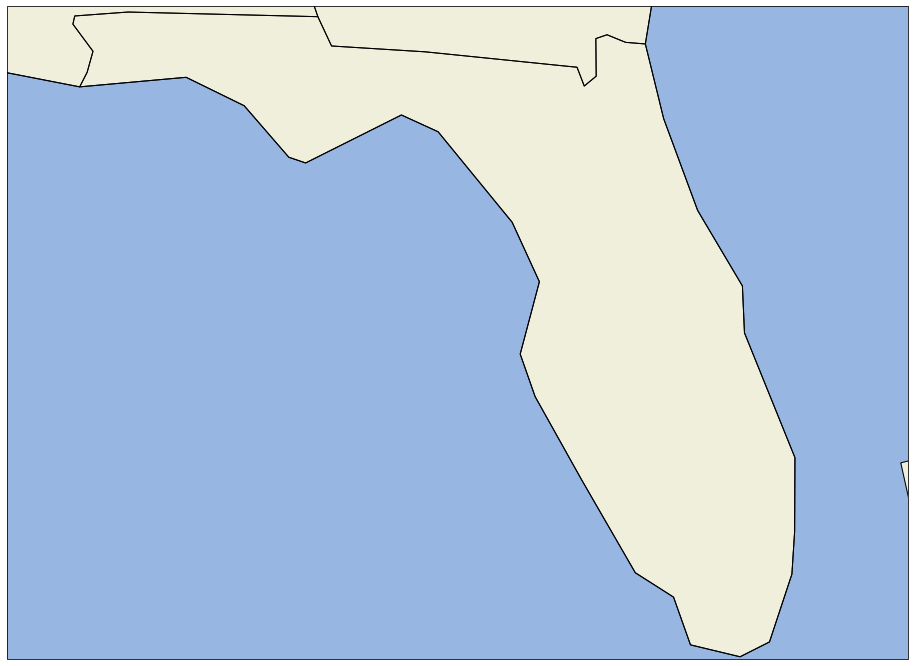

In [15]:
lons = [SaltBarren['Lon'], JuncusMarsh['Lon'], Yg_mangroves['Lon'], mangroves['Lon']]
lats = [SaltBarren['Lat'], JuncusMarsh['Lat'], Yg_mangroves['Lat'], mangroves['Lat']]
print (SaltBarren['Lon'])

latN = 31
latS = 25
lonW = -88
lonE = -79
cLat = (latN + latS)/2
cLon = (lonW + lonE )/2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
res = '110m' # Coarsest and quickest to display; other options are '10m' (slowest) and '50m'.
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1,projection=proj)
ax.set_extent ([lonW,lonE,latS,latN])
ax.add_feature (cfeature.LAND.with_scale(res))
ax.add_feature (cfeature.OCEAN.with_scale(res))
ax.add_feature(cfeature.COASTLINE.with_scale(res))
ax.add_feature (cfeature.STATES.with_scale(res));

import folium
this_map = folium.Map(prefer_canvas=True)
def plotDot(point):
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(this_map)


df.data(x="Lon", y="Lat", kind="scatter")





In [ ]:
lons = [SaltBarren['Lon'], JuncusMarsh['Lon'], Yg_mangroves['Lon'], mangroves['Lon']]
lats = [SaltBarren['Lat'], JuncusMarsh['Lat'], Yg_mangroves['Lat'], mangroves['Lat']]
print (SaltBarren['Lon'])